# Importing Essential Libraries

In [12]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [13]:
# Import datasets
data = pd.read_csv('imdb_top_2000_movies.csv')
data.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN


In [14]:
# Remove all commas
data['Votes'] = data['Votes'].str.replace(',', '')
# Remove $ sign and M symbol and convert to float
data['Gross'] = data['Gross'].str.replace('$', '')
data['Gross'] = data['Gross'].str.replace('M', '')
data['Gross'] = data['Gross'].astype(float)
data['Gross'] = data['Gross'] * (10 ** 6)
df = pd.DataFrame(data)

In [15]:
df

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,2002655,"Crime, Drama",Francis Ford Coppola,Marlon Brando,134970000.0
1,The Godfather Part II,1974,202,9.0,90.0,1358608,"Crime, Drama",Francis Ford Coppola,Al Pacino,57300000.0
2,Ordinary People,1980,124,7.7,86.0,56476,Drama,Robert Redford,Donald Sutherland,54800000.0
3,Lawrence of Arabia,1962,218,8.3,100.0,313044,"Adventure, Biography, Drama",David Lean,Peter O'Toole,44820000.0
4,Straw Dogs,1971,113,7.4,73.0,64331,"Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN
...,...,...,...,...,...,...,...,...,...,...
1995,The Young Victoria,2009,105,7.2,64.0,66235,"Biography, Drama, History",Jean-Marc Vallée,Emily Blunt,11000000.0
1996,Tooth Fairy,I 2010,101,5.0,36.0,49527,"Comedy, Family, Fantasy",Michael Lembeck,Dwayne Johnson,60020000.0
1997,The Informant!,2009,108,6.5,66.0,67318,"Biography, Comedy, Crime",Steven Soderbergh,Matt Damon,33310000.0
1998,Youth in Revolt,2009,90,6.4,63.0,75956,"Comedy, Drama, Romance",Miguel Arteta,Michael Cera,15280000.0


In [16]:
df.describe()

,Duration,IMDB Rating,Metascore,Gross
count,2000.000000,2000.000000,1919.000000,1.903000e+03
mean,113.939000,6.922600,61.044294,6.618636e+07
std,22.946035,0.955618,17.937722,7.282108e+07
min,50.000000,1.500000,9.000000,0.000000e+00
25%,98.000000,6.400000,48.000000,1.822000e+07
50%,110.000000,7.000000,61.000000,4.482000e+07
75%,125.000000,7.600000,74.000000,8.707000e+07
max,271.000000,9.300000,100.000000,7.605100e+08


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    2000 non-null   object 
 1   Release Year  2000 non-null   object 
 2   Duration      2000 non-null   int64  
 3   IMDB Rating   2000 non-null   float64
 4   Metascore     1919 non-null   float64
 5   Votes         2000 non-null   object 
 6   Genre         2000 non-null   object 
 7   Director      2000 non-null   object 
 8   Cast          2000 non-null   object 
 9   Gross         1903 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 156.4+ KB


In [18]:
print("Data type : ", type(data))
print("Data dims : ", data.shape)
print(data.dtypes)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (2000, 10)
Movie Name       object
Release Year     object
Duration          int64
IMDB Rating     float64
Metascore       float64
Votes            object
Genre            object
Director         object
Cast             object
Gross           float64
dtype: object


In [19]:
# Drop columns
df = df.drop(['Genre', 'Director', 'Cast'], axis=1)
df

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Gross
0,The Godfather,1972,175,9.2,100.0,2002655,134970000.0
1,The Godfather Part II,1974,202,9.0,90.0,1358608,57300000.0
2,Ordinary People,1980,124,7.7,86.0,56476,54800000.0
3,Lawrence of Arabia,1962,218,8.3,100.0,313044,44820000.0
4,Straw Dogs,1971,113,7.4,73.0,64331,NaN
...,...,...,...,...,...,...,...
1995,The Young Victoria,2009,105,7.2,64.0,66235,11000000.0
1996,Tooth Fairy,I 2010,101,5.0,36.0,49527,60020000.0
1997,The Informant!,2009,108,6.5,66.0,67318,33310000.0
1998,Youth in Revolt,2009,90,6.4,63.0,75956,15280000.0


<Axes: >

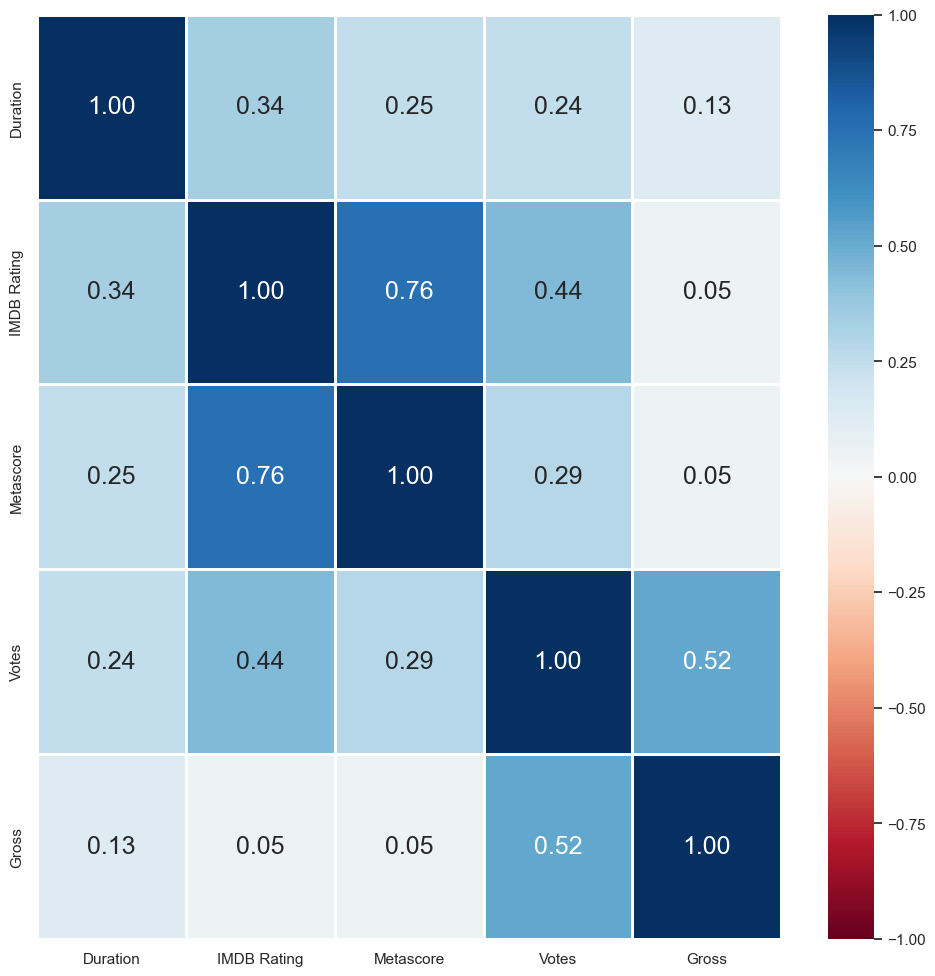

In [23]:
corr=pd.DataFrame(df[['Duration', 'IMDB Rating', 'Metascore', 'Votes', 'Gross']])
f = plt.figure(figsize=(12, 12))
sb.heatmap(corr.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

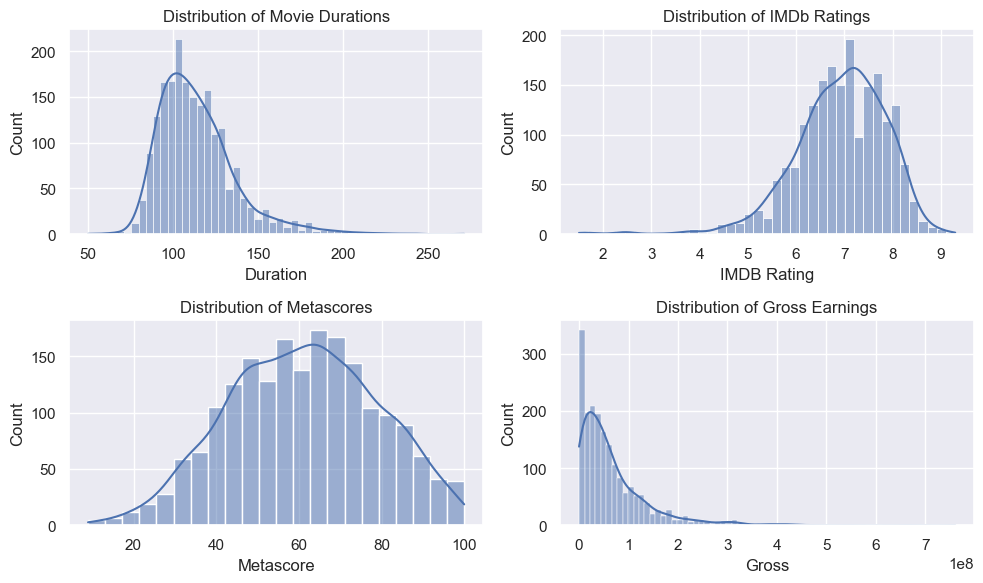

In [31]:
# Histograms/Distribution Plots
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sb.histplot(data['Duration'], kde=True)
plt.title('Distribution of Movie Durations')


plt.subplot(2, 2, 2)
sb.histplot(data['IMDB Rating'], kde=True)
plt.title('Distribution of IMDb Ratings')

plt.subplot(2, 2, 3)
sb.histplot(data['Metascore'].dropna(), kde=True)
plt.title('Distribution of Metascores')

plt.subplot(2, 2, 4)
sb.histplot(data['Gross'].dropna(), kde=True)
plt.title('Distribution of Gross Earnings')
plt.tight_layout()
plt.show()


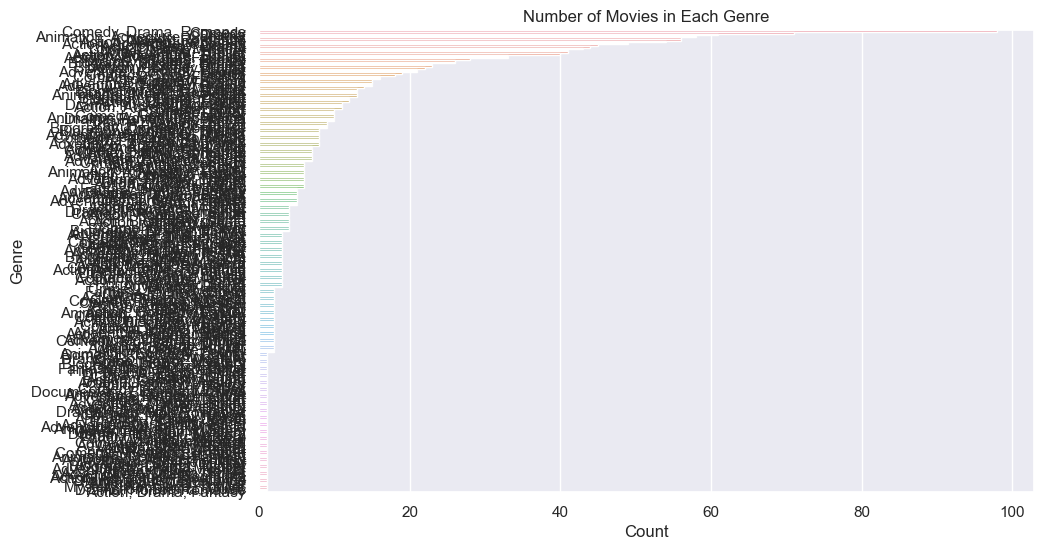

In [38]:
# Bar Plot for Movie Genres
plt.figure(figsize=(10, 6))
sb.countplot(y=data['Genre'], order=data['Genre'].value_counts().index)
plt.title('Number of Movies in Each Genre')
plt.xlabel('Count')
plt.show()


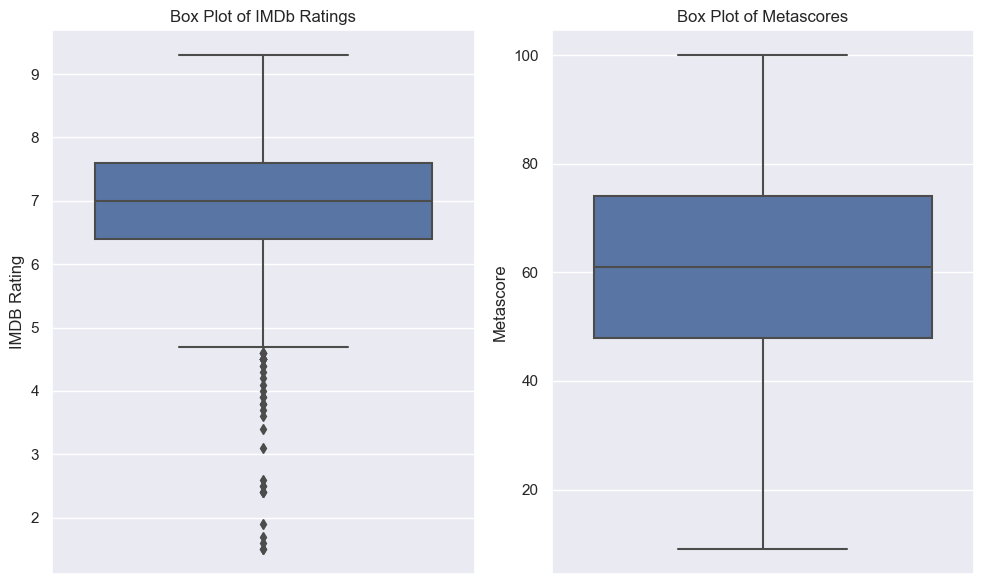

In [42]:
# Box Plot for IMDb Ratings and Metascores
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sb.boxplot(y=data['IMDB Rating'])
plt.title('Box Plot of IMDb Ratings')

plt.subplot(1, 2, 2)
sb.boxplot(y=data['Metascore'])
plt.title('Box Plot of Metascores')
plt.tight_layout()
plt.show()


In [62]:
Rating = pd.DataFrame(data['IMDB Rating'])
Metascore = pd.DataFrame(data['Metascore'])

print("IMDB Rating DataFrame:")
print("Number of entries:", Rating.shape[0])
print("Mean IMDb Rating:", Rating.mean())
print("Median IMDb Rating:", Rating.median())
print("Standard Deviation of IMDb Rating:", Rating.std())

print("\nMetascore DataFrame:")
print("Number of entries:", Metascore.shape[0])
print("Mean Metascore:", Metascore.mean())
print("Median Metascore:", Metascore.median())
print("Standard Deviation of Metascore:", Metascore.std())

IMDB Rating DataFrame:
Number of entries: 2000
Mean IMDb Rating: IMDB Rating    6.9226
dtype: float64
Median IMDb Rating: IMDB Rating    7.0
dtype: float64
Standard Deviation of IMDb Rating: IMDB Rating    0.955618
dtype: float64

Metascore DataFrame:
Number of entries: 2000
Mean Metascore: Metascore    61.044294
dtype: float64
Median Metascore: Metascore    61.0
dtype: float64
Standard Deviation of Metascore: Metascore    17.937722
dtype: float64


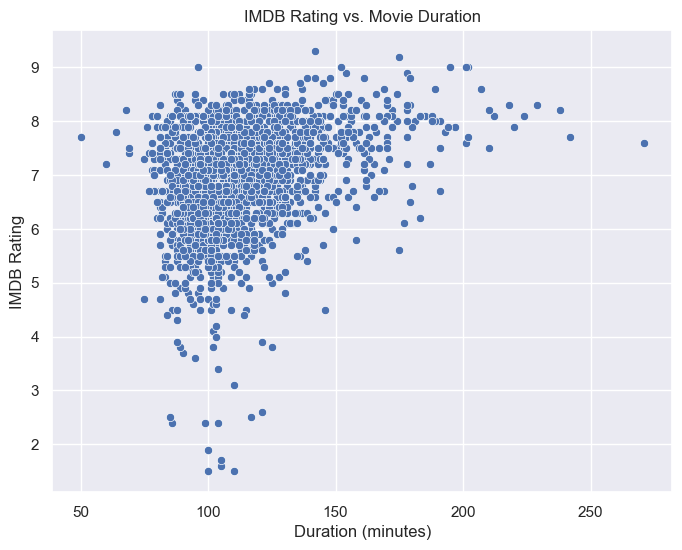

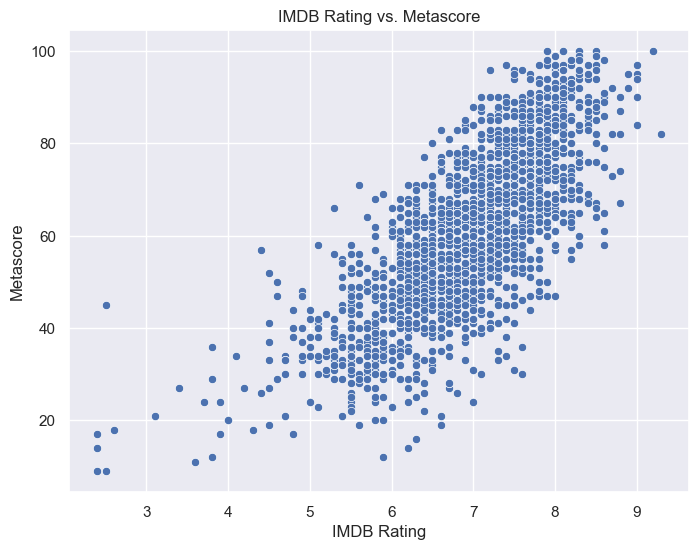

In [44]:
# Scatter Plot of IMDb Ratings vs. Movie Durations
plt.figure(figsize=(8, 6))
sb.scatterplot(x='Duration', y='IMDB Rating', data=data)
plt.title('IMDB Rating vs. Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('IMDB Rating')
plt.show()

# Scatter Plot of IMDb Ratings vs. Metascores
plt.figure(figsize=(8, 6))
sb.scatterplot(x='IMDB Rating', y='Metascore', data=data.dropna(subset=['Metascore']))
plt.title('IMDB Rating vs. Metascore')
plt.xlabel('IMDB Rating')
plt.ylabel('Metascore')
plt.show()

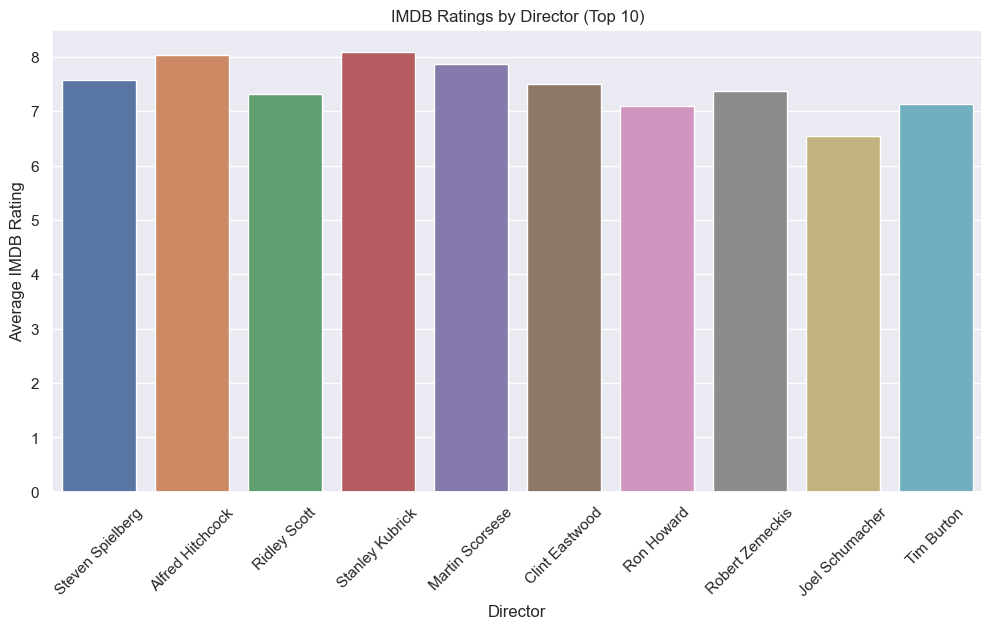

In [51]:
# Bar Plot for IMDb Ratings by Director
plt.figure(figsize=(12, 6))
top_directors = data['Director'].value_counts().head(10).index
sb.barplot(x='Director', y='IMDB Rating', data=data[data['Director'].isin(top_directors)], errorbar=None)
plt.title('IMDB Ratings by Director (Top 10)')
plt.xlabel('Director')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.show()

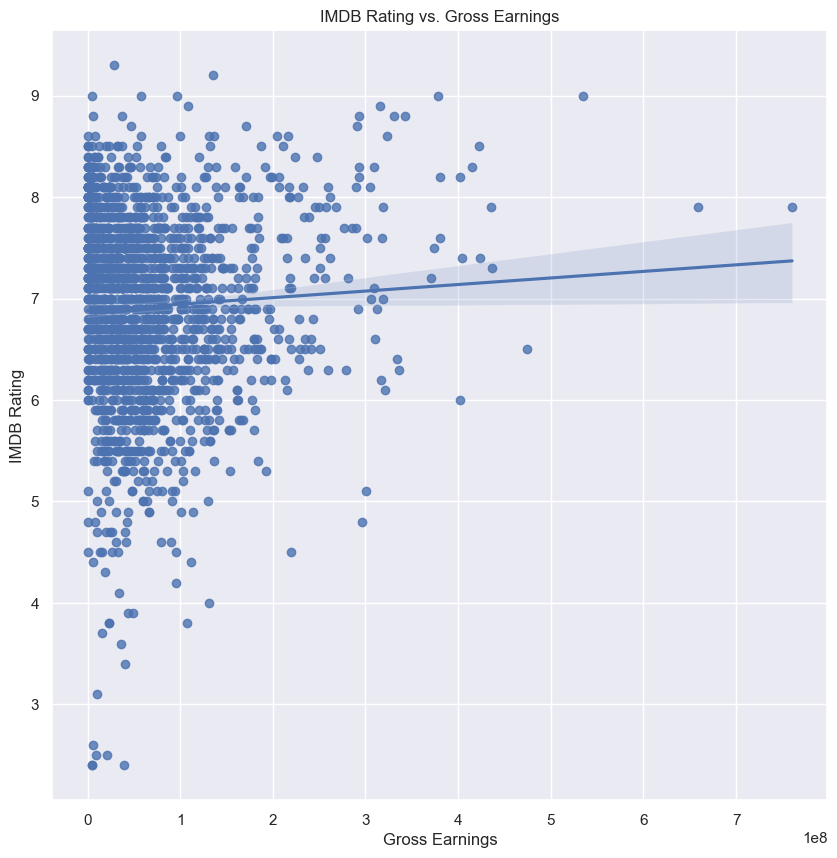

In [59]:
# Regression Plot of IMDb Ratings vs. Gross Earnings
plt.figure(figsize=(10,10))
sb.regplot(x='Gross', y='IMDB Rating', data=data.dropna(subset=['Gross']))
plt.title('IMDB Rating vs. Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('IMDB Rating')
plt.show()